In [1]:
from fastai.vision import *

Neuronal network for roomba by Mariano Miretta, using fastai

Dataset creation with roomba bumper


In [2]:
path = Path('/root/JupyterNotebooks/roomba/livingroom2/dataset_from_roomba')

path.ls()

[PosixPath('/root/JupyterNotebooks/roomba/livingroom2/dataset_from_roomba/export.pkl'),
 PosixPath('/root/JupyterNotebooks/roomba/livingroom2/dataset_from_roomba/FRONT_CRASH'),
 PosixPath('/root/JupyterNotebooks/roomba/livingroom2/dataset_from_roomba/LEFT_BUMP'),
 PosixPath('/root/JupyterNotebooks/roomba/livingroom2/dataset_from_roomba/RIGHT_BUMP'),
 PosixPath('/root/JupyterNotebooks/roomba/livingroom2/dataset_from_roomba/YES'),
 PosixPath('/root/JupyterNotebooks/roomba/livingroom2/dataset_from_roomba/models')]

In [3]:
classes = ['YES','FRONT_CRASH','LEFT_BUMP','RIGHT_BUMP']

delete all the files that we cannot read

In [4]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=1024)

YES


FRONT_CRASH


LEFT_BUMP


RIGHT_BUMP


In [6]:
bs=16

#def _flip_affine() -> TfmAffine:
#    "Flip `x` horizontally."
 #   return [[-1, 0, 0.],
  #          [0,  1, 0],
   #         [0,  0, 1.]]
#flip_affine = TfmAffine(_flip_affine)

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=640,bs=bs, num_workers=2).normalize(imagenet_stats)

In [7]:
data.classes

['FRONT_CRASH', 'LEFT_BUMP', 'RIGHT_BUMP', 'YES']

In [8]:
##data.show_batch()
#tfms = get_transforms(max_rotate=25); len(tfms#)

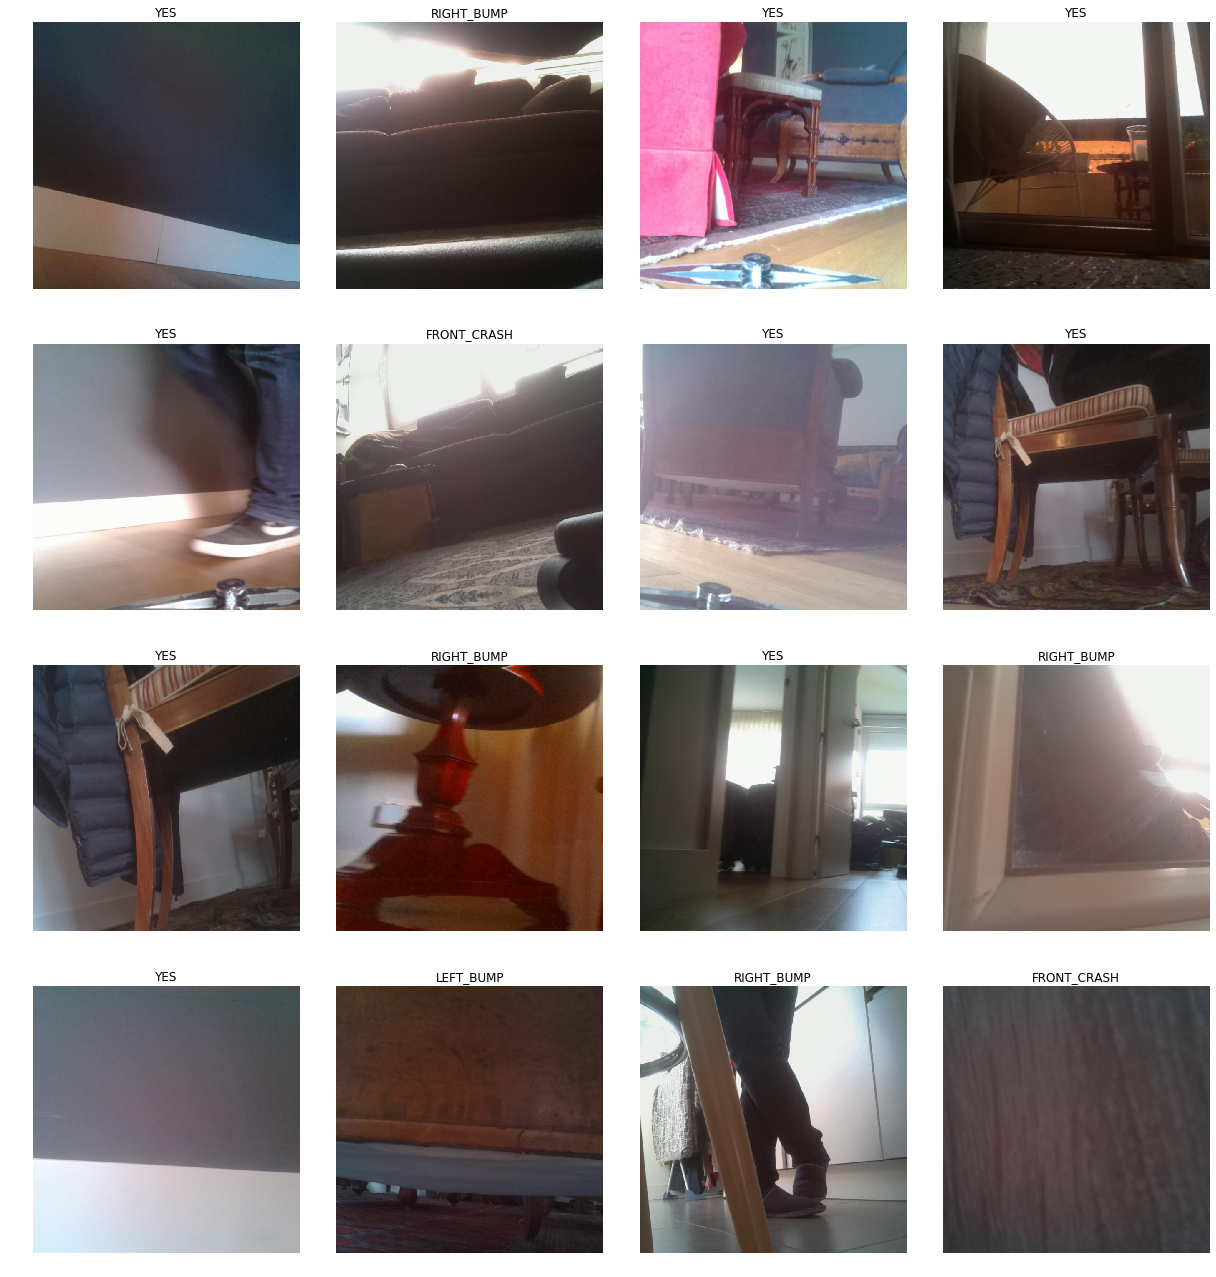

In [9]:
data.show_batch(rows=7, figsize=(17,18))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['FRONT_CRASH', 'LEFT_BUMP', 'RIGHT_BUMP', 'YES'], 4, 5410, 1352)

In [11]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

#To enable on both GPUs
learn.model = nn.DataParallel(learn.model, device_ids=[0, 1])
#learn.model

In [11]:
 learn.fit_one_cycle(12)

In [12]:
learn.save('stage-1')

In [12]:
learn.load('stage-1')
learn.unfreeze()


In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


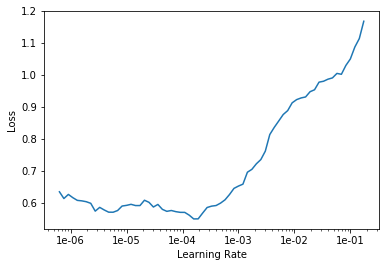

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-4))

#learn.model = nn.DataParallel(learn.model, device_ids=[1])

In [16]:
learn.save('stage-2')

Interpretation


In [17]:
learn.load('stage-2');

In [18]:
interp = ClassificationInterpretation.from_learner(learn)


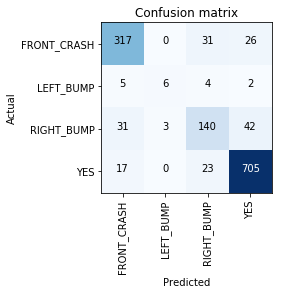

In [19]:
interp.plot_confusion_matrix()

In [20]:
#interp = ClassificationInterpretation.from_learner(learn)

#interp.plot_top_losses(9, figsize=(15, 11))htop


# Now, let's do some real testing

In [21]:
#Export the model for production
learn.export()
data.classes

['FRONT_CRASH', 'LEFT_BUMP', 'RIGHT_BUMP', 'YES']

In [22]:
defaults.device = torch.device('cuda')

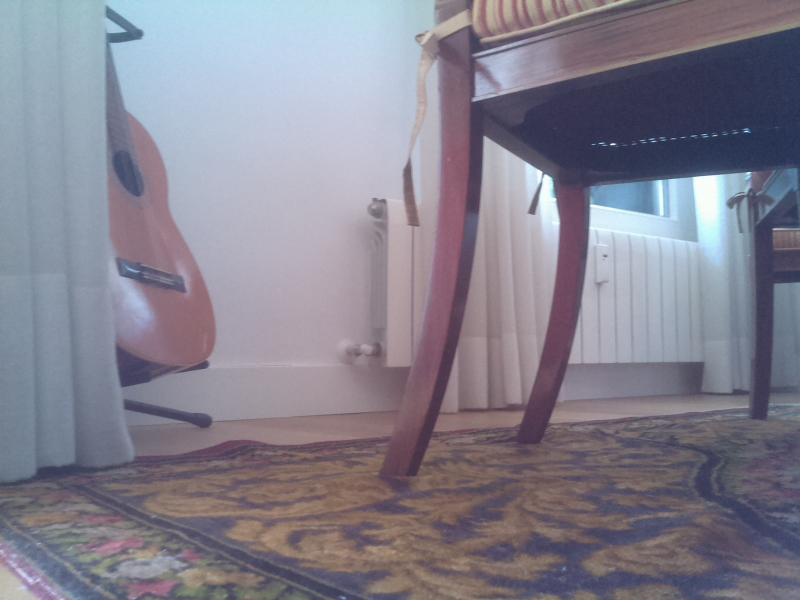

In [23]:
img = open_image('/root/JupyterNotebooks/roomba/livingroom/NO/2019-03-27 13:36:43.509640_no.jpg')
img

In [24]:
learn = load_learner(path)

print (path)

/root/JupyterNotebooks/roomba/livingroom2/dataset_from_roomba


In [25]:
pred_class,pred_idx,outputs = learn.predict(img)

print (pred_class)
print (pred_idx)
print (outputs)

FRONT_CRASH
tensor(0)
tensor([0.8356, 0.0082, 0.0865, 0.0696])


In [26]:
#Let's take an image from other day and at different resolution.

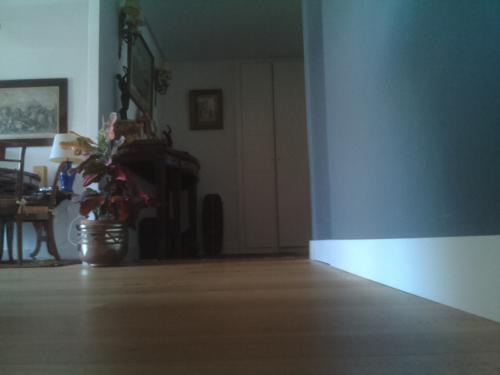

In [27]:
img = open_image('/root/JupyterNotebooks/roomba/SI/2019-03-19 15:49:04.437812_si.jpg')
img



In [28]:
pred_class,pred_idx,outputs = learn.predict(img)

print (pred_class)
print (pred_idx)
print (outputs)

YES
tensor(3)
tensor([1.2628e-02, 3.0800e-04, 7.3673e-03, 9.7970e-01])


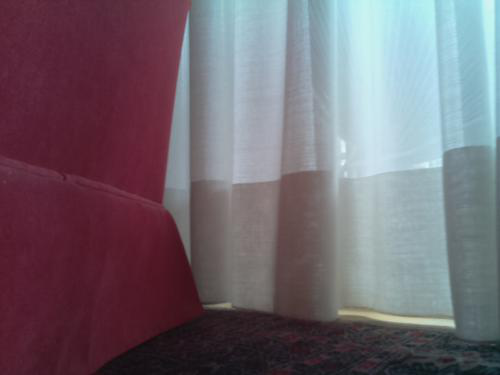

In [29]:
#and another one... different resolution and not part of this training set  
img = open_image('/root/JupyterNotebooks/roomba/NO/2019-03-19 16:16:34.340064_no.jpg')
img

In [30]:
pred_class,pred_idx,outputs = learn.predict(img)

print (pred_class)
print (pred_idx)
print (outputs)

FRONT_CRASH
tensor(0)
tensor([0.7462, 0.0048, 0.0486, 0.2005])


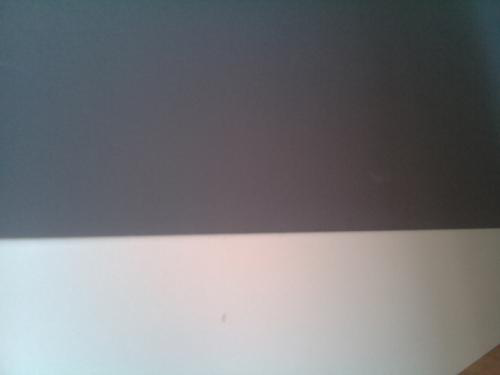

In [31]:
img = open_image('/root/JupyterNotebooks/roomba/NO/2019-03-19 16:22:07.487264_no.jpg')
img


In [32]:
pred_class,pred_idx,outputs = learn.predict(img)

print (pred_class)
print (pred_idx)
print (outputs)

FRONT_CRASH
tensor(0)
tensor([9.4754e-01, 4.4922e-04, 1.5409e-02, 3.6597e-02])
